In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
# Importing the dataset

financials = pd.read_csv('costpercompany.csv')

In [4]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       29 non-null     object 
 1   surcharges    29 non-null     float64
 2   RoR           29 non-null     float64
 3   dailycost     29 non-null     int64  
 4   costwithload  29 non-null     float64
 5   costofDemand  29 non-null     float64
 6   Sales         29 non-null     int64  
 7   WearandTear   29 non-null     float64
 8   Fcost         29 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.2+ KB


In [5]:
financials.describe()

,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.402759,10.488966,172.448276,46.862069,4.906897,13024.517241,16.110345,1.173621
std,0.699065,3.564261,60.520709,28.265936,4.572428,9120.761558,18.885356,0.637931
min,0.750000,1.860000,49.000000,-49.800000,-2.200000,3300.000000,0.000000,-0.012000
25%,1.050000,9.200000,148.000000,51.500000,2.200000,6650.000000,0.000000,0.636000
50%,1.150000,10.580000,173.000000,56.000000,3.500000,9673.000000,8.300000,1.108000
75%,1.430000,12.200000,199.000000,60.000000,7.200000,15651.000000,26.700000,1.652000
max,3.900000,21.160000,370.000000,72.000000,16.400000,40008.000000,53.400000,2.610000


In [6]:
financials.head()

,Company,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,Yashida,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,Wisconsin,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,Virginia,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,United,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,Texas,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636


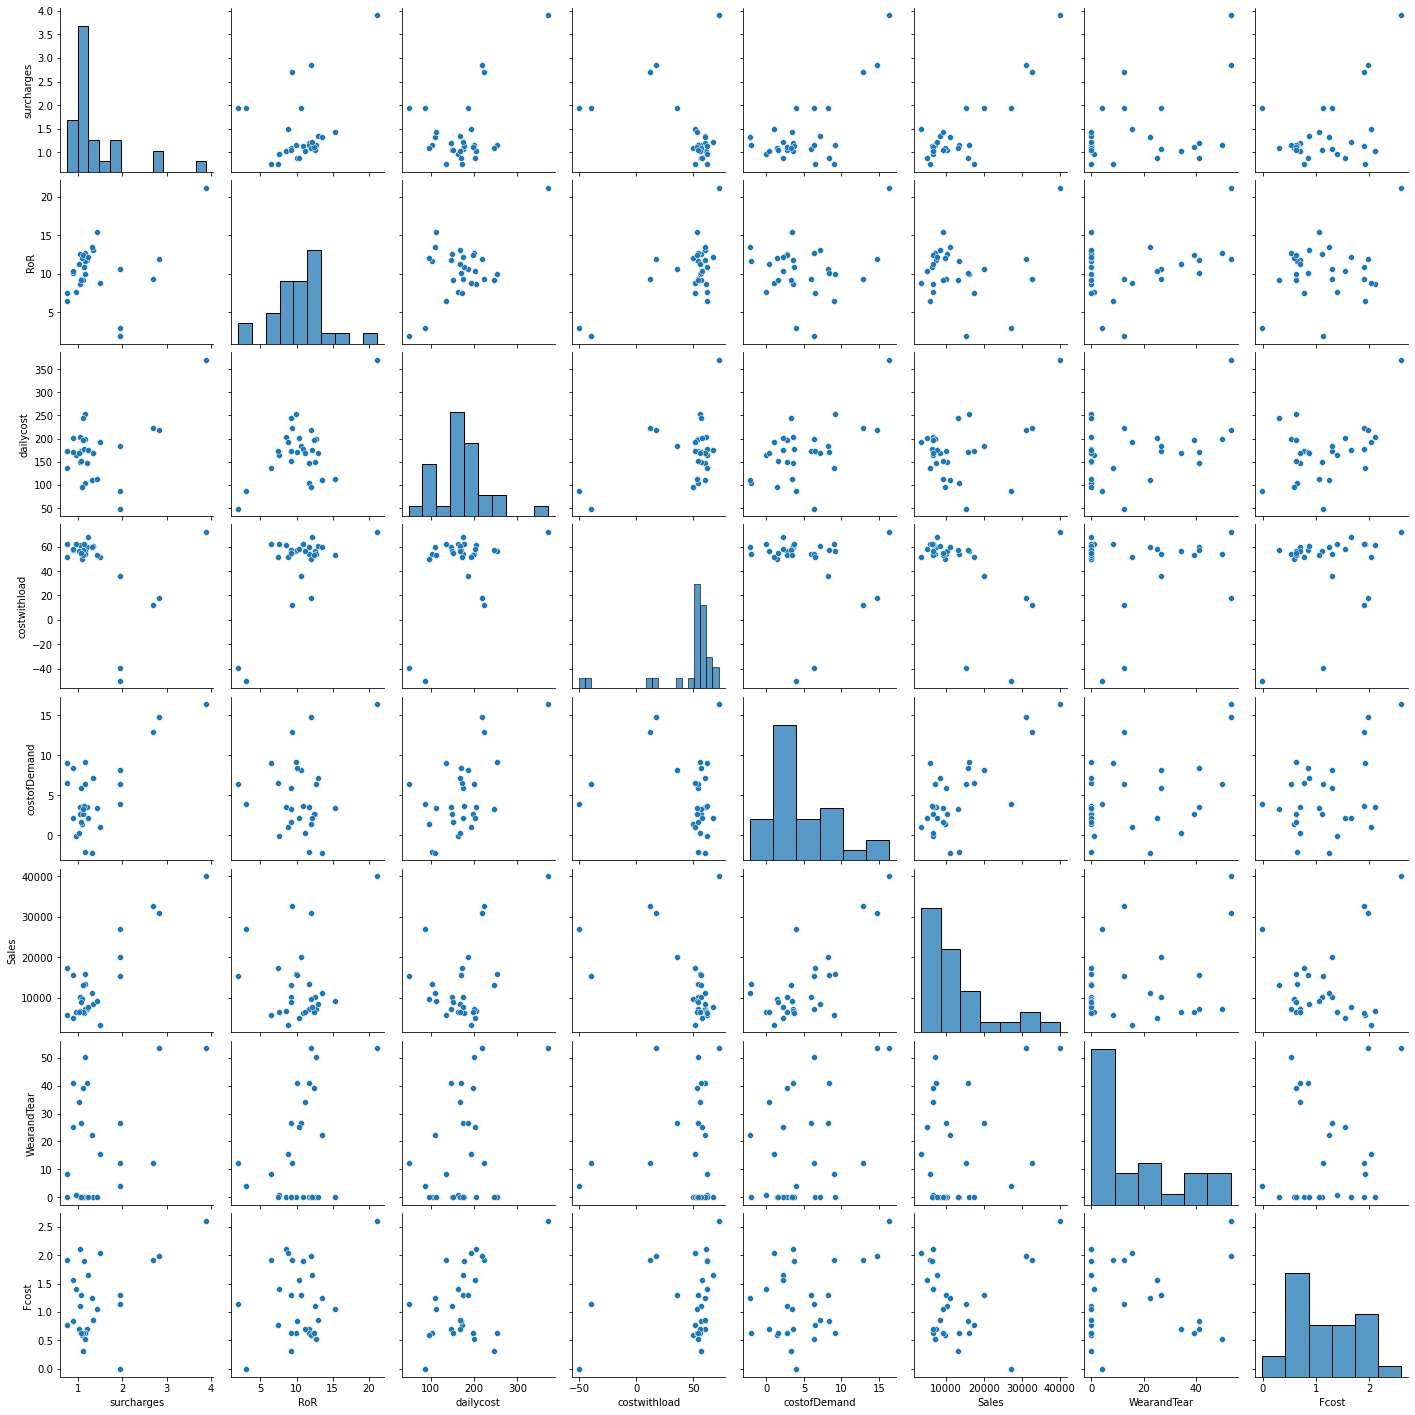

In [7]:
X = financials.iloc[:, [1,2,3,4,5,6,7,8]]

sns.pairplot(X)

In [9]:
# Scale the data

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

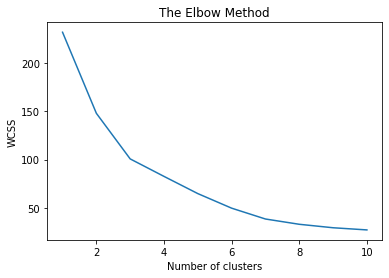

In [10]:
# Method 1: K-Clustering
# Using the elbow method to find the optimal number of clusters
# N.B: the no of cluster is the farthest point on the curve/elbow correspondingto the x-axis on the graph. In this case, it the no of cluster is 3. 

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Fitting k-means to the dataset

kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [12]:
# Since the no of variables we are working is more than 2, we need to reduce dimensionality before we can visualise

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.44839294, 0.25725108])

In [13]:
sum(pca.explained_variance_ratio_)

0.7056440181560044

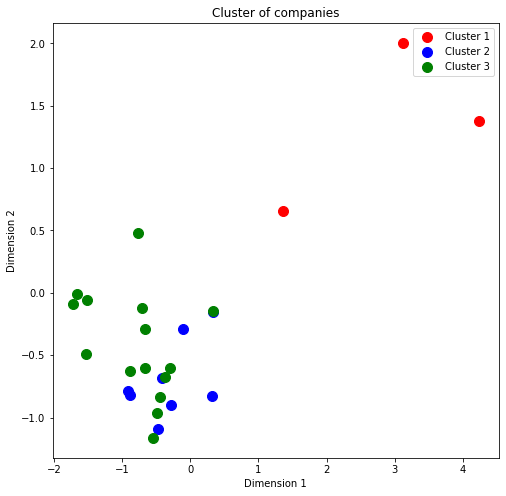

In [16]:
# Visualising the clusters

colours = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1], 
                s = 100, c = colours[i], label = 'Cluster '+str(i+1))    
plt.title('Cluster of companies')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

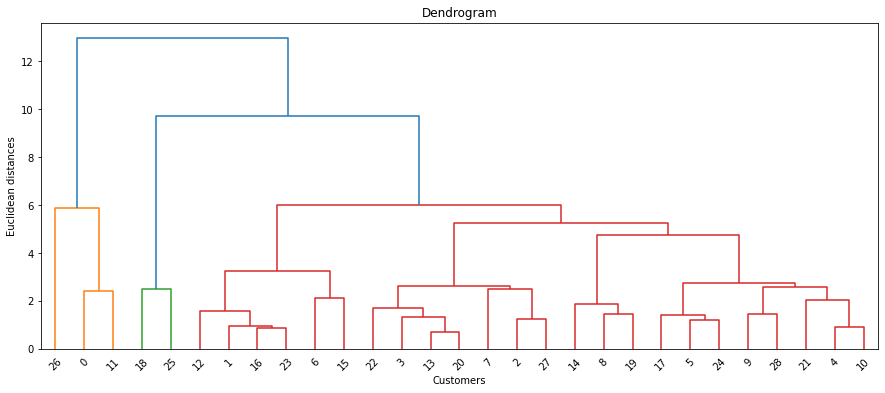

In [17]:
# Method 2: Hierarchical Clustering
# Using the dendrogram to find the optimal number of clusters
# N.B: Euclidean distance is usually taken as half of the total. in this case total is 12, half is 6
# When we draw an horizontal line from point 6, it cuts 3 vertical lines, which is equal to the number of cluster in the dataset

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendroogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
# Fitting Hierarchical Clustering to the dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [19]:
# Since the no of variables we are working is more than 2, we need to reduce dimensionality before we can visualise

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.44839294, 0.25725108])

In [20]:
sum(pca.explained_variance_ratio_)

0.7056440181560044

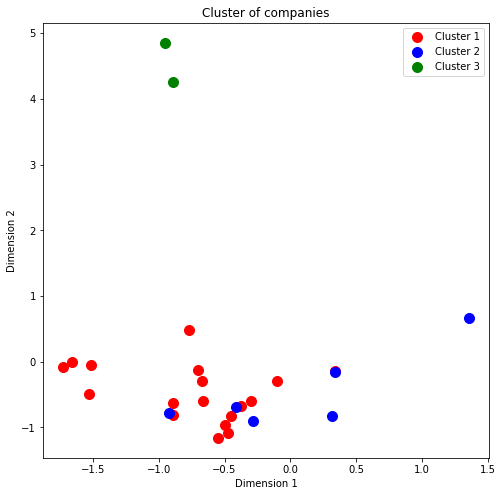

In [21]:
# Visualising the clusters

colours = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_hc == i, 0], X_reduced[y_hc == i, 1], 
                s = 100, c = colours[i], label = 'Cluster '+str(i+1))    
plt.title('Cluster of companies')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

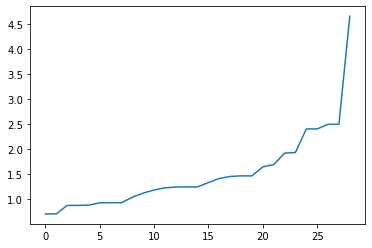

In [39]:
# Method 3: DBSCAN

from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors(n_neighbors=2)
distances, indices = neighbours.fit(X).kneighbors(X)

distances = distances[:, 1]
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [40]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples=3)
y_dbscan = dbscan.fit_predict(X)

In [41]:
#inspect the arrray to identify number of clusters

y_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [42]:
# Since the no of variables we are working is more than 2, we need to reduce dimensionality before we can visualise

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.44839294, 0.25725108])

In [43]:
sum(pca.explained_variance_ratio_)

0.7056440181560044

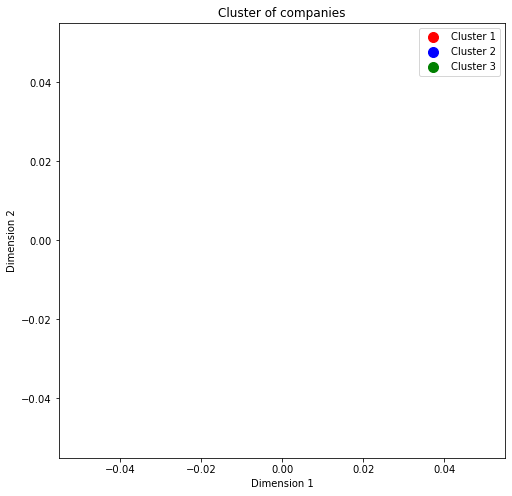

In [44]:
# Visualising the clusters

colours = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_dbscan == i, 0], X_reduced[y_dbscan == i, 1], 
                s = 100, c = colours[i], label = 'Cluster '+str(i+1))    
plt.title('Cluster of companies')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()